In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error as mse

### About Dataset
Walmart merupakan perusahaan amerika yang mengelola jaringan toserba.

Data yang digunakan adalah data dari 05-02-2010 hingga 01-11-2012 dengan informasi data sebagai berikut:
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate

In [2]:
df = pd.read_csv('C:/Users/rosyi/Videos/Machine Learning/Final Project/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Cleansing Data

In [4]:
# Merubah type date
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])

c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packag

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


tipe dari data date sudah berubah menjadi datetime

In [6]:
# Menambahkan fitur berupa nama hari, bulan, dan tahun.
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,Sunday,May,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,Thursday,December,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,Friday,February,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,Friday,February,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,Monday,May,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,Friday,September,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,Thursday,May,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,Monday,December,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,Friday,October,2012


In [7]:
# Mengurutkan kolom
df = df[['Date','Day','Month','Year','Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Weekly_Sales']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6435 non-null   datetime64[ns]
 1   Day           6435 non-null   object        
 2   Month         6435 non-null   object        
 3   Year          6435 non-null   int64         
 4   Store         6435 non-null   int64         
 5   Holiday_Flag  6435 non-null   int64         
 6   Temperature   6435 non-null   float64       
 7   Fuel_Price    6435 non-null   float64       
 8   CPI           6435 non-null   float64       
 9   Unemployment  6435 non-null   float64       
 10  Weekly_Sales  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 553.1+ KB


# Exploratory Data Analysis (EDA)

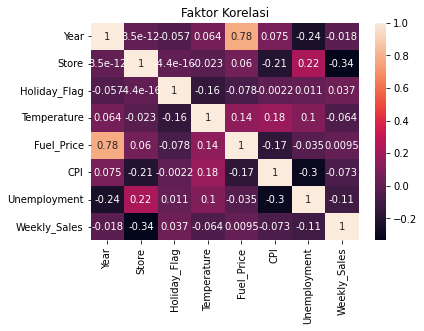

In [8]:
# melihat faktor korelasi tiap feature dengan label
corr_dat = df.corr()
sns.heatmap(corr_dat,xticklabels=corr_dat.columns, yticklabels=corr_dat.columns, annot=True)
plt.title('Faktor Korelasi')
plt.show()

Tidak ada feature yang memiliki korelasi yang tinggi dengan label.

In [9]:
# melihat informasi dari setiap tanggal
df.groupby(['Date']).count()

,Day,Month,Year,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
Date,,,,,,,,,,
2010-01-10,45,45,45,45,45,45,45,45,45,45
2010-02-04,45,45,45,45,45,45,45,45,45,45
2010-02-07,45,45,45,45,45,45,45,45,45,45
2010-02-19,45,45,45,45,45,45,45,45,45,45
2010-02-26,45,45,45,45,45,45,45,45,45,45
...,...,...,...,...,...,...,...,...,...,...
2012-10-08,45,45,45,45,45,45,45,45,45,45
2012-10-19,45,45,45,45,45,45,45,45,45,45
2012-10-26,45,45,45,45,45,45,45,45,45,45


Pada 1 data tanggal memiliki 45 informasi dari store 1 hingga store 45 sehingga setiap store dapat dibandingkan karena data sales yang diambil dari tiap toko dilakukan pada hari yang sama.

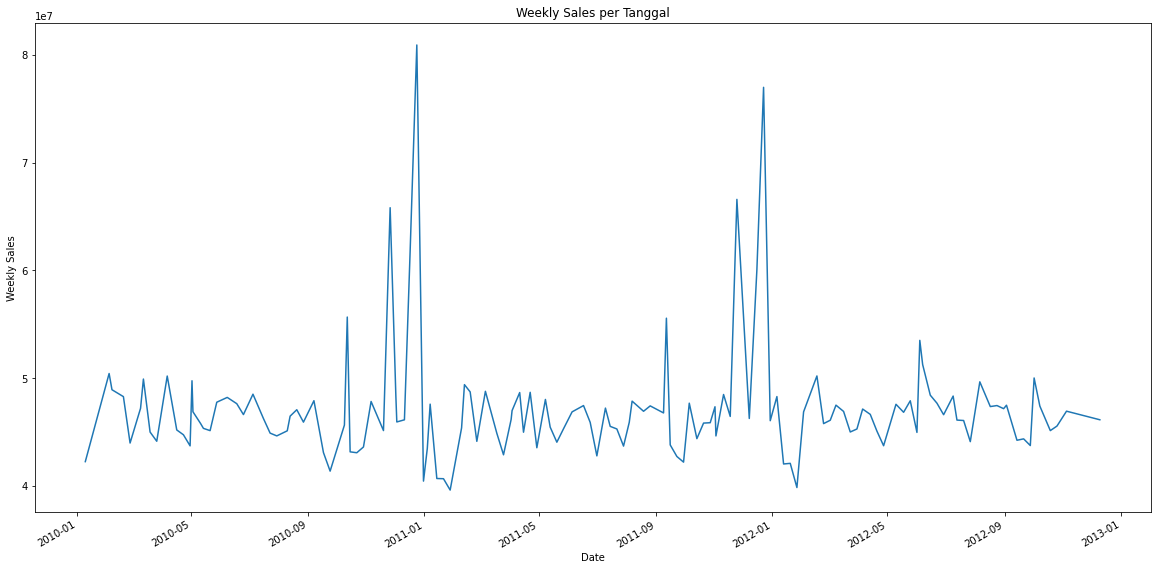

In [10]:
# Visualisasi Weekly Sales dengan tanggalnya
df.groupby('Date').agg({'Weekly_Sales': ['sum']}).plot(legend = False, figsize = (20,10))
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales per Tanggal')
plt.show()

In [11]:
# Melihat tanggal penjualan tertinggi  
df1 = df.groupby('Date').agg({'Weekly_Sales': ['sum']})
df1[df1[('Weekly_Sales','sum')]>70000000]

,Weekly_Sales
,sum
Date,
2010-12-24,80931415.60
2011-12-23,76998241.31


In [12]:
# Melihat tanggal penjualan terendah
df1 = df.groupby('Date').agg({'Weekly_Sales': ['sum']})
df1[df1[('Weekly_Sales','sum')]<40000000]

,Weekly_Sales
,sum
Date,
2011-01-28,39599852.99
2012-01-27,39834974.67


Jumlah penjualan terbanyak terdapat pada tanggal 24 desember 2010 dan 23 desember 2011. Sedangkan penjualan paling sedikit ada pada tanggal 28 januari 2011 dan 27 januari 2012.

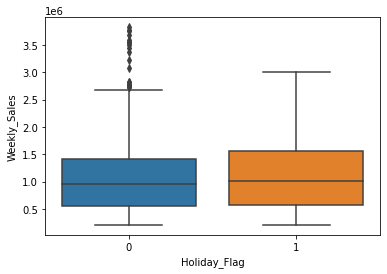

In [13]:
# Visualisasi untuk mengetahui hubungan antara weekly sales dengan holiday flag
fig = plt.figure()
ax = sns.boxplot(y = 'Weekly_Sales', x = 'Holiday_Flag', data = df)
plt.show()

Dari boxplot menunjukan tidak ada perbedaan yang signifikan antara minggu libur dan minggu tidak libur. Dapat dilihat bahwa median sales pada minggu libur dan tidak libur berkisar di 1x10^6 dan juga range untuk Q1 hingga Q3 yang tidak terlihat signifikan. Namun pada minggu bukan libur terlihat terdapat outlierpada weekly_sales.

In [14]:
# membagi minggu yang bukan holiday dengan jumlah penjualan pada tanggal tersebut
holiday = df[df['Holiday_Flag']==1]
holiday = holiday.groupby('Date', as_index = False).agg({'Weekly_Sales': ['sum']})
holiday

,Date,Weekly_Sales
,,sum
0,2010-10-09,45634397.84
1,2010-11-26,65821003.24
2,2010-12-02,48336677.63
3,2010-12-31,40432519.00
4,2011-09-09,46763227.53
5,2011-11-02,47336192.79
6,2011-11-25,66593605.26
7,2011-12-30,46042461.04
8,2012-07-09,48330059.31


In [15]:
# membagi minggu holiday dengan jumlah penjualan pada tanggal tersebut
nonholiday = df[df['Holiday_Flag']==0]
nonholiday = nonholiday.groupby('Date', as_index=False).agg({'Weekly_Sales': ['sum']})
nonholiday

,Date,Weekly_Sales
,,sum
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
128,2012-10-08,47403451.04
129,2012-10-19,45122410.57
130,2012-10-26,45544116.29


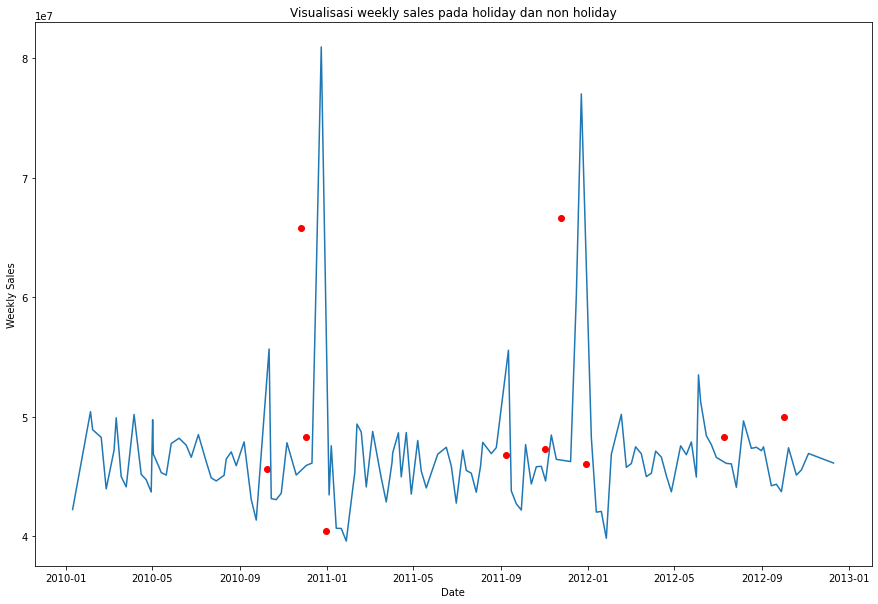

In [16]:
#Visualisasi weekly sales pada holiday dan non holiday
plt.figure(figsize=(15,10))
plt.scatter(holiday['Date'], holiday[('Weekly_Sales','sum')], c = 'red')
plt.plot(nonholiday['Date'], nonholiday[('Weekly_Sales','sum')])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Visualisasi weekly sales pada holiday dan non holiday')
plt.show()

- Penjualan `tertinggi` pada holiday berada pada tanggal `26-Nov-2010` dan `25-Nov-2011` yang merupakan libur `Thanksgiving`. Sedangkan penjualan `terendah` pada holiday adalah pada `31-Dec-2010` yang merupakan `Christmas`. 
- Penjualan `tertinggi` pada non-holiday terdapat pada tanggal `24-Dec-2010` dan `23-Dec-2011`. Sedangkan penjualan paling sedikit pada non-holiday adalah pada tanggal `28-Jan-2011` dan `27-Jan-2012`.

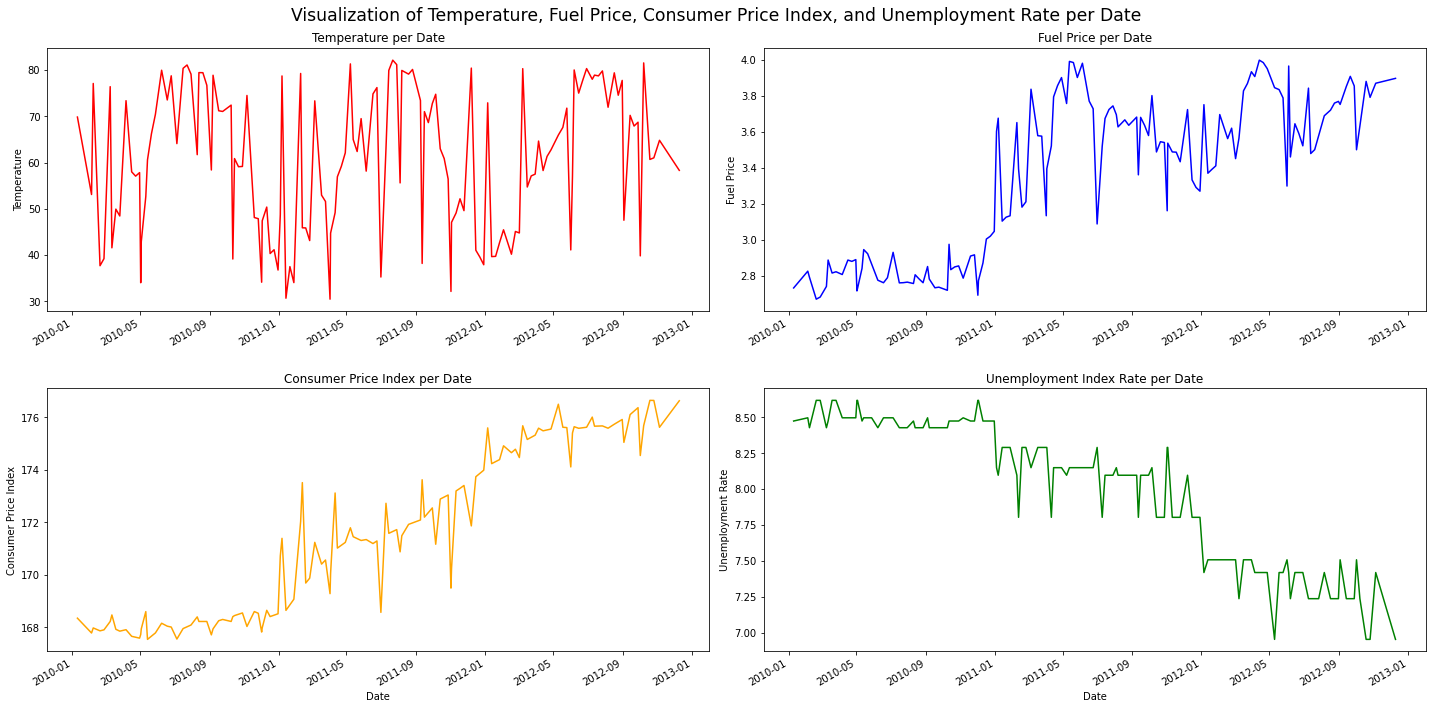

In [17]:
# visualisasi dari Temperature, Fuel Price, Consumer Price Index, dan Unemployment Rate per tanggal
from matplotlib.lines import Line2D
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (20,10))

df.groupby('Date', as_index=False).agg({'Temperature': ['mean']}).plot(x = 'Date', y = ('Temperature','mean'), kind = 'line',legend = False, c = 'red', ax = ax1)
ax1.set_title('Temperature per Date')
ax1.set_xlabel(' ')
ax1.set_ylabel('Temperature')

df.groupby('Date', as_index=False).agg({'Fuel_Price': ['mean']}).plot(x = 'Date', y = ('Fuel_Price','mean'), kind = 'line',legend = False,c = 'blue', ax = ax2)
ax2.set_title('Fuel Price per Date')
ax2.set_xlabel(' ')
ax2.set_ylabel('Fuel Price')

df.groupby('Date', as_index=False).agg({'CPI':['mean']}).plot(x= 'Date', y = ('CPI', 'mean'), kind = 'line', legend = False, c = 'orange', ax = ax3)
ax3.set_title('Consumer Price Index per Date')
ax3.set_xlabel('Date')
ax3.set_ylabel('Consumer Price Index')

df.groupby('Date', as_index=False).agg({'Unemployment':['mean']}).plot(x= 'Date', y = ('Unemployment', 'mean'), kind = 'line', legend = False, c = 'green', ax = ax4)
ax4.set_title('Unemployment Index Rate per Date')
ax4.set_xlabel('Date')
ax4.set_ylabel('Unemployment Rate')


fig.suptitle('Visualization of Temperature, Fuel Price, Consumer Price Index, and Unemployment Rate per Date', fontsize = 'xx-large') #create Large title
plt.tight_layout() #anticipate the overlays between the figure
plt.show()

Dapat dilihat bahwa CPI dan Fuel Price memiliki trend yang mirip dimana nilainya bernilai konstan hingga pada kisaran 01-2011 lalu meningkat terus seiring waktu. Berbanding terbalik dengan unemployement rate dimana nilainya menurun pada kisaran 01-2011. Sedangkan untuk temperature memiliki nilai yang cukup fluktuatif pada tiap tanggalnya namun secara keseluruhan dalam waktu 2 tahun memiliki trend yang konstan.

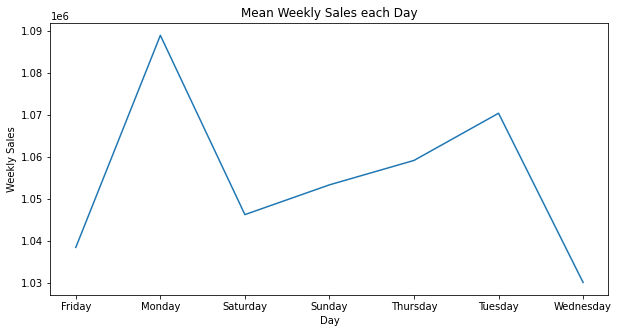

In [18]:
# Visualisasi mean weekly sales each day
df.groupby('Day', as_index=False).agg({'Weekly_Sales': ['mean']}).plot(x = 'Day', y = ('Weekly_Sales', 'mean'), kind = 'line', legend = False, figsize = (10,5))
plt.title('Mean Weekly Sales each Day')
plt.xlabel('Day')
plt.ylabel('Weekly Sales')

plt.show()

Rata-rata penjualan paling banyak terjadi pada hari senin dan selasa. Sedangkan penjualan terendah rata-rata terjadi pada hari jumat dan rabu. Namun perlu diperhatikan bahwa hasil penjualan rata-rata di tiap harinya `TIDAK` memiliki perbedaan yang jauh.

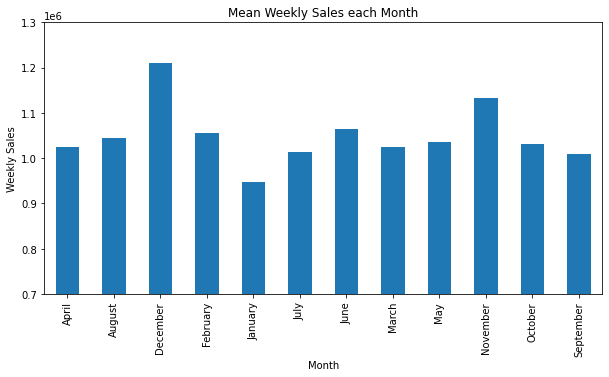

In [19]:
# Visualisasi mean weekly sales each month
month = df.groupby('Month', as_index=False).agg({'Weekly_Sales': ['mean']})
month.plot(x = 'Month', y = ('Weekly_Sales', 'mean'), kind = 'bar', legend = False, figsize = (10,5))
plt.title('Mean Weekly Sales each Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.ylim(700000,1300000)
plt.show()


Rata-rata penjualan mingguan paling besar berada pada bulan desember diikuti dengan november dan paling sedikit adalah pada bulan january. Namun perlu diperhatikan bahwa hasil penjualan rata-rata di tiap bulannya `TIDAK` memiliki perbedaan yang jauh.

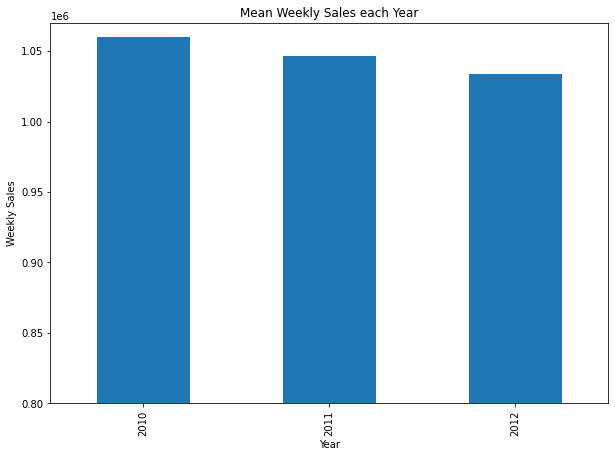

In [20]:
# Visualisasi mean weekly sales each year
df.groupby('Year', as_index=False).agg({'Weekly_Sales': ['mean']}).plot(x = 'Year', y = ('Weekly_Sales', 'mean'), kind = 'bar', legend = False, figsize = (10,7))
plt.title('Mean Weekly Sales each Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.ylim(800000,1070000)
plt.show()

Penjualan rata-rata paling banyak berada pada tahun 2010 dan paling sedikit berada pada tahun 2012. Namun perlu diperhatikan bahwa hasil penjualan rata-rata di tiap tahunnya `TIDAK` memiliki perbedaan yang jauh.

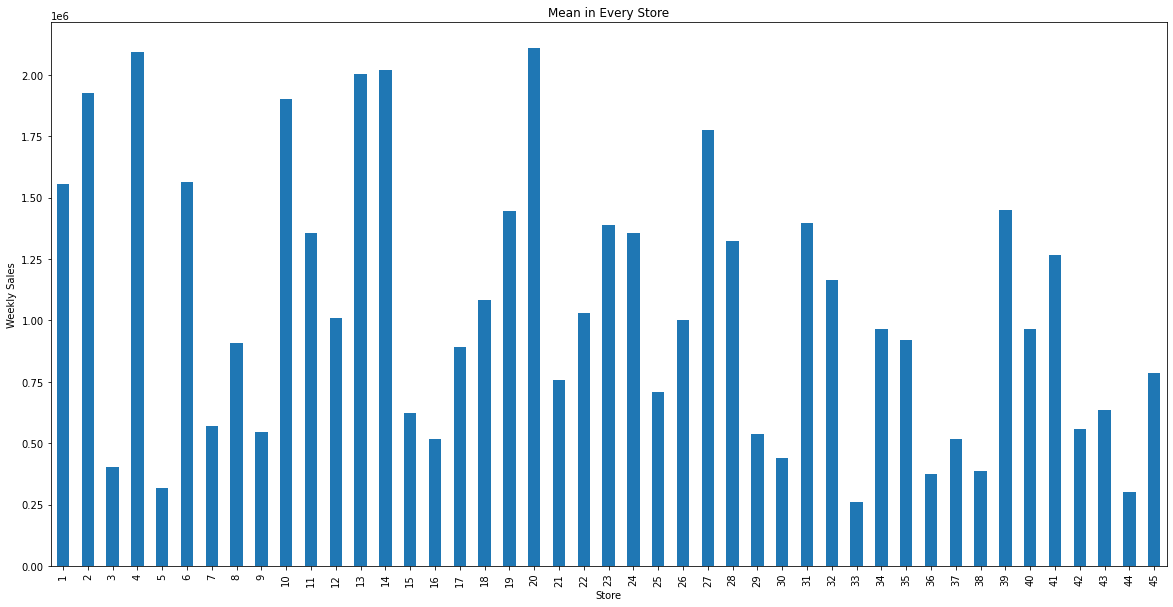

In [21]:
# Melihat perbandingan penjualan dari tiap store.
from matplotlib.pyplot import bar

df.groupby('Store', as_index=False).agg({'Weekly_Sales': ['mean']}).plot(x= 'Store', y = ('Weekly_Sales', 'mean'), kind = 'bar', legend = False, figsize = (20,10))
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Mean in Every Store')
plt.show()

Hasil penjualan tertinggi terdapat pada store 4 dan 20, diikuti dengan store 2,10,13,14,dan 27. Sedangkan store yang memiliki penjualan terendah terdapat pada store 33 diikuti dengan store 3,5, dan 44.

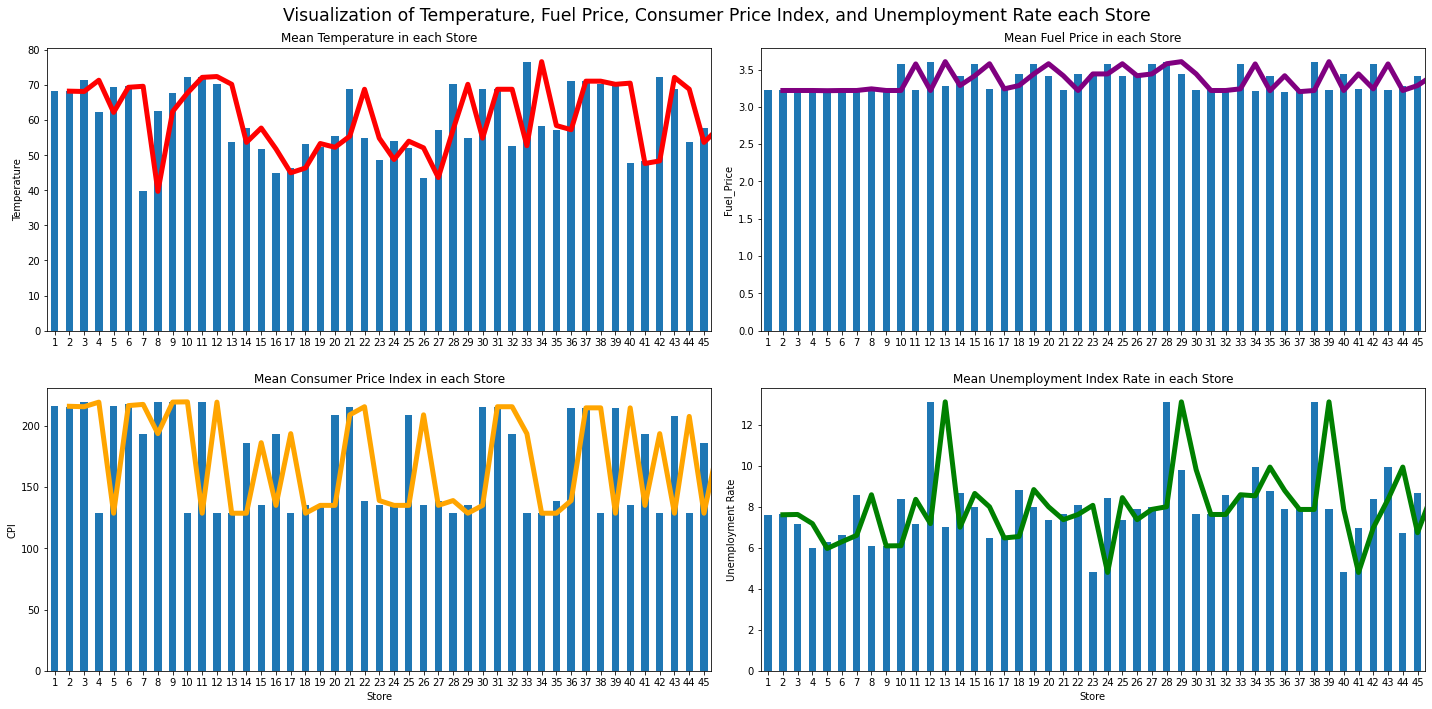

In [22]:
from matplotlib.lines import Line2D
from matplotlib.pyplot import xlim
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (20,10))

df.groupby('Store', as_index=False).agg({'Temperature': ['mean']}).plot(x= 'Store', y = ('Temperature', 'mean'), kind = 'bar', legend = False, ax = ax1)
df.groupby('Store', as_index=False).agg({'Temperature': ['mean']}).plot(x= 'Store', y = ('Temperature', 'mean'), kind = 'line', legend = False, c = 'red', ax = ax1, linewidth = 5)
ax1.set_xlabel(' ')
ax1.set_ylabel('Temperature')
ax1.set_title('Mean Temperature in each Store')

df.groupby('Store', as_index=False).agg({'Fuel_Price': ['mean']}).plot(x= 'Store', y = ('Fuel_Price', 'mean'), kind = 'bar', legend = False, ax = ax2)
df.groupby('Store', as_index=False).agg({'Fuel_Price': ['mean']}).plot(x= 'Store', y = ('Fuel_Price', 'mean'), kind = 'line', legend = False, c = 'purple', ax = ax2, linewidth = 5)
ax2.set_xlabel(' ')
ax2.set_ylabel('Fuel_Price')
ax2.set_title('Mean Fuel Price in each Store')

df.groupby('Store', as_index=False).agg({'CPI': ['mean']}).plot(x= 'Store', y = ('CPI', 'mean'), kind = 'bar', legend = False, ax = ax3)
df.groupby('Store', as_index=False).agg({'CPI': ['mean']}).plot(x= 'Store', y = ('CPI', 'mean'), kind = 'line', legend = False, c = 'orange', ax = ax3, linewidth = 5)
ax3.set_title('Mean Consumer Price Index in each Store')
ax3.set_xlabel('Store')
ax3.set_ylabel('CPI')

df.groupby('Store', as_index=False).agg({'Unemployment': ['mean']}).plot(x= 'Store', y = ('Unemployment', 'mean'), kind = 'bar', legend = False, ax = ax4)
df.groupby('Store', as_index=False).agg({'Unemployment': ['mean']}).plot(x= 'Store', y = ('Unemployment', 'mean'), kind = 'line', legend = False, c = 'green', ax = ax4, linewidth = 5)
ax4.set_title('Mean Unemployment Index Rate in each Store')
ax4.set_xlabel('Store')
ax4.set_ylabel('Unemployment Rate')


fig.suptitle('Visualization of Temperature, Fuel Price, Consumer Price Index, and Unemployment Rate each Store', fontsize = 'xx-large') #create Large title
plt.tight_layout() #anticipate the overlays between the figure
plt.show()

Dapat dilihat bahwa features dari temperature, fuel price, CPI, dan unemployment rate dari tiap store tidak memiliki hubungan yang cukup kuat dengan penjualan dari tiap store jika dibandingkan dengan visualisasi sebelumnya yaitu mean weekly sales dari tiap store. Namun, dapat dilihat pada line plot temperature, fuel price, dan CPI memiliki trend yang konstan sedangkan pada unemployment rate memiliki trend yang cukup berfluktuasi.

# One-Hot Encoding

In [23]:
df = pd.get_dummies(df, columns=['Day','Month'])
df

,Date,Year,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales,Day_Friday,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2010-05-02,2010,1,0,42.31,2.572,211.096358,8.106,1643690.90,0,...,0,0,0,0,0,0,1,0,0,0
1,2010-12-02,2010,1,1,38.51,2.548,211.242170,8.106,1641957.44,0,...,1,0,0,0,0,0,0,0,0,0
2,2010-02-19,2010,1,0,39.93,2.514,211.289143,8.106,1611968.17,1,...,0,1,0,0,0,0,0,0,0,0
3,2010-02-26,2010,1,0,46.63,2.561,211.319643,8.106,1409727.59,1,...,0,1,0,0,0,0,0,0,0,0
4,2010-05-03,2010,1,0,46.50,2.625,211.350143,8.106,1554806.68,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,2012,45,0,64.88,3.997,192.013558,8.684,713173.95,1,...,0,0,0,0,0,0,0,0,0,1
6431,2012-05-10,2012,45,0,64.89,3.985,192.170412,8.667,733455.07,0,...,0,0,0,0,0,0,1,0,0,0
6432,2012-12-10,2012,45,0,54.47,4.000,192.327265,8.667,734464.36,0,...,1,0,0,0,0,0,0,0,0,0
6433,2012-10-19,2012,45,0,56.47,3.969,192.330854,8.667,718125.53,1,...,0,0,0,0,0,0,0,0,1,0


# Modelling

### Create X and Y variable and split them into training and testing sets

In [121]:
# Mengkonversi tipe datetime menjadi proleptic Gregorian ordinal
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['Date']=df['Date'].map(dt.datetime.toordinal)

X = df[['Date','Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
y = df['Weekly_Sales']

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

### Modelling Using Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression

# mendefinisikan linear regression
reg = linear_model.LinearRegression()

#train model menggunakan training set
reg.fit(X_train,y_train)

#koefisien dari regresi linear
print('Coefficients: ', reg.coef_)

#intercept dari regresi linear
print('Intercept: ', reg.intercept_)

Coefficients:  [     0.         -15062.47214355  71173.13073277   -717.74795029
  -1178.18242042  -2254.94726984 -24211.44572721]
Intercept:  2014021.4170014483


Variance score: 0.14871680636309093


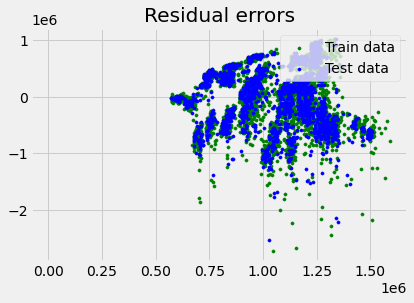

In [124]:
 # variance score: semakin mendekati 1 semakin baik
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot untuk residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors di training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors di test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line untuk zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [125]:
# Pengaplikasian metrics r^2 score, MAE, dan RMSE untuk melihat performa dari model yang digunakan.

y_pred = reg.predict(X_test)

# r^2 score
from numpy import square
from sklearn.metrics import r2_score
print('r^2 Score: ', r2_score(y_test,y_pred))

# MAE
from sklearn.metrics import mean_absolute_error
print('MAE : ',mean_absolute_error(y_test, y_pred))

# RMSE
print('RMSE : ',np.sqrt(mse(y_test, y_pred)))

r^2 Score:  0.14871680636309093
MAE :  433703.08744026476
RMSE :  523549.44810907263


Dari hasil metrics yang didapatkan menggunakan linear regression dapat disimpulkan bahwa linear regression bukanlah model yang cocok untuk data walmart. 

### Hyperparameter tuning on linear regression

In [126]:
# Hyperparameter yang digunakan pada linear regression adalah Ridge, Lasso, dan Elastic Net
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [127]:
# Mendefinisikan ridge, lasso, dan ElasticNet
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
EN = linear_model.ElasticNet()

In [128]:
ridge.fit(X_train,y_train)

#koefisien dari ridge regression
print('Coefficients: ', ridge.coef_)

#intercept dari ridge regression
print('Intercept: ', ridge.intercept_)

Coefficients:  [     0.         -15062.5520412   70931.96484195   -718.30469014
  -1182.802266    -2254.89548533 -24209.03688357]
Intercept:  2014061.8763343026


In [129]:
lasso.fit(X_train,y_train)

#koefisien dari Lasso regression
print('Coefficients: ', lasso.coef_)

#intercept dari Lasso regression
print('Intercept: ', lasso.intercept_)

Coefficients:  [     0.         -15062.48538284  71158.24877813   -717.80789787
  -1173.38570106  -2254.9261658  -24210.925802  ]
Intercept:  2014002.5387931922


In [130]:
EN.fit(X_train,y_train)

#koefisien dari Elastic Net regression
print('Coefficients: ', EN.coef_)

#intercept dari Elastic Net regression
print('Intercept: ', EN.intercept_)

Coefficients:  [     0.         -15109.87094226   8190.69581951   -923.70168726
   -380.73638111  -2190.81211623 -20667.73299241]
Intercept:  1990101.1455410002


In [131]:
# Membuat fungsi untuk memperlihatkan hasil metrics dari Ridge, Lasso, dan Elastic Net
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_EN = EN.predict(X_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def score(input):
    if input == ridge:
        print('r^2 Score ridge: ', r2_score(y_test,y_pred_ridge))
        print('MAE ridge : ',mean_absolute_error(y_test, y_pred_ridge))
        print('RMSE ridge : ',np.sqrt(mse(y_test, y_pred_ridge)))
        print(' ')
    elif input == lasso:
        print('r^2 Score lasso: ', r2_score(y_test,y_pred_lasso))
        print('MAE lasso : ',mean_absolute_error(y_test, y_pred_lasso))
        print('RMSE lasso : ',np.sqrt(mse(y_test, y_pred_lasso)))
        print(' ')
    else:
        print('r^2 Score ElasticNet: ', r2_score(y_test,y_pred_EN))
        print('MAE ElasticNet : ',mean_absolute_error(y_test, y_pred_EN))
        print('RMSE ElasticNet : ',np.sqrt(mse(y_test, y_pred_EN)))


In [132]:
score(ridge)
score(lasso)
score(EN)

r^2 Score ridge:  0.14871656314523585
MAE ridge :  433703.82832305017
RMSE ridge :  523549.5229000268
 
r^2 Score lasso:  0.14871702416149446
MAE lasso :  433703.0901698606
RMSE lasso :  523549.3811347437
 
r^2 Score ElasticNet:  0.1482617402260401
MAE ElasticNet :  434042.55545439624
RMSE ElasticNet :  523689.36499878735


Setelah dilakukan hyperparameter tuning, model dari linear regression tetap bukanlah model yang tepat untuk walmart dataset.

# Feature Engineering
Akan dicoba jika menggunakan feature dari Day, Month, dan Year

### Create X and Y variable and split them into training and testing sets

In [36]:
# Mendefinisikan variabel X tanpa feature Date, dan memasukkan deature day, month, dan year kedalam pemodelan
df1 = df.drop(columns=['Weekly_Sales','Date'])
X = df1
y = df['Weekly_Sales']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

### Modelling

In [38]:
# mendefinisikan linear regression
reg = linear_model.LinearRegression()

#train model menggunakan training set
reg.fit(X_train,y_train)

#koefisien dari regresi linear
print('Coefficients: ', reg.coef_)

#intercept dari regresi linear
print('Intercept: ', reg.intercept_)

Coefficients:  [-44029.8427232  -15053.76277596  20475.64866537   -447.8657025
  67509.80921803  -2124.39695195 -27632.73117889  -5226.37639086
  35714.93668014 -55862.97702688  19332.5777052  -11430.41754649
  37813.3819386  -20341.12535972   3156.76676548    523.7504224
 145262.12519409  26531.2925321  -88139.40970174 -22817.09410882
  28290.09505806 -38369.83754007 -46653.30717943  84634.20255216
 -47758.63420579 -44659.94978845]
Intercept:  90320617.78315425


In [39]:
y_pred = reg.predict(X_test)

# r^2 score
from sklearn.metrics import r2_score
print('r^2 Score: ', r2_score(y_test,y_pred))

# MAE
from sklearn.metrics import mean_absolute_error
print('MAE : ',mean_absolute_error(y_test, y_pred))

# RMSE
print('RMSE : ',np.sqrt(mse(y_test, y_pred)))

r^2 Score:  0.15635058284620795
MAE :  433667.11000564776
RMSE :  521196.72942413506


Penambahan feature day, month, dan year tidak menjadikan hasil dari pemodelan regresi membaik. Namun dapat dilihat pada hasil metrics bahwa Feature engineering yang dilakukan meningkatkan hasil dari metrics.

### Modelling Using Random Forest Regression

In [119]:
from sklearn.ensemble import RandomForestRegressor

### Create X and Y variable and split them into training and testing sets

In [100]:
X = df[['Date','Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]
y = df['Weekly_Sales']

In [101]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1,
                                                 test_size=0.3)

In [102]:
# Melihat dimensi dari data yang digunakan untuk pemodelan
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4504, 7)
(4504,)
(1931, 7)
(1931,)


In [103]:
# Mendefinisikan variabel RF untuk random forest regressor
RF = RandomForestRegressor()

In [110]:
# Menentukan performa dari model
from sklearn.metrics import mean_squared_error as mse
RF.fit(X_train,y_train)
RF_pred =  RF.predict(X_test)
RF_rmse = np.sqrt(mse(y_test, RF_pred))
print('Random Forest Regression has RMSE: ', RF_rmse)
print('Random Forest Regression has r^2 Score: ', r2_score(y_test,RF_pred))

Random Forest Regression has RMSE:  147187.90098922345
Random Forest Regression has r^2 Score:  0.9327173836364298


Variance score: 0.9322942568354552


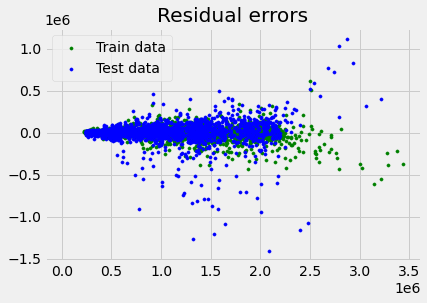

In [105]:
 # variance score: 1 means perfect prediction
print('Variance score: {}'.format(RF.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(RF.predict(X_train), RF.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(RF.predict(X_test), RF.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'best')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

Dari pemodelan menggunakan random forest regression, didapatkan nilai r^2 sebesar 0.933 dan RMSE sebesar kurang lebih 147187 yang menandakan bahwa model dari random forest adalah baik jika diterapkan pada data walmart. 

### Hyperparameter tuning on random forest regressor

In [108]:
# Menentukan batasan untuk pencarian parameter terbaik
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [109]:
# Menggunakan randomized Search untuk menentukan parameter terbaik untuk model random forest regression

rf = RandomForestRegressor()  # Mendefinisikan random forest regressor

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Melakukan fit dari random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, return_train_score=True, verbose=3)

In [111]:
# Melihat parameter terbaik hasil dari hyperparameter tuning
rf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80}

In [135]:
# Melihat performa dari random forest regression yang sudah dilakukan hyperparameter tuning
new_pred = rf_random.best_estimator_.predict(X_test)
new_rmse = np.sqrt(mse(y_test, new_pred))
print('New Model has RMSE:', new_rmse)
print('New Model has r^2 Score:', r2_score(y_test, new_pred))

New Model has RMSE: 156423.29174934435
New Model has r^2 Score: 0.9240091173469256


In [113]:
# Membandingkan model sebelum dan sesudah di hyperparameter tuning 
print('Improvement of:', ((RF_rmse - new_rmse)/RF_rmse)*100, '%')

Improvement of: 1.2328374226640273 %


Model random forest regression setelah dilakukan hyperparameter tuning mengalami peningkatan akurasi sebesar 1.23 persen.

### Feature Engineering

Melakukan feature engineering pada Random Forest Regressor yang sudah diaplikasikan hyperparameter tuning

In [114]:
# Mendefinisikan variabel X dan Y. Pada variabel X, feature Day, Month, dan Year menggantikan Feature Date.
FE = df.drop(['Date','Weekly_Sales'], axis=1)
X = FE
y = df['Weekly_Sales']

In [115]:
# Splitting variabel menjadi train dan test
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1,
                                                 test_size=0.3)

In [116]:
# Melihat dimensi dari variabel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4504, 26)
(4504,)
(1931, 26)
(1931,)


In [117]:
# Mendefinisikan variabel rf_fe dengan parameter dari random forest setelah dilakukan hyperparameter tuning.
rf_fe = RandomForestRegressor(n_estimators=522, min_samples_split=5,
                                min_samples_leaf=2,max_features='auto',
                                max_depth=None)

In [134]:
# Melihat performa dari model pada feature engineering
rf_fe.fit(X_train, y_train)
rf_pred = rf_fe.predict(X_test)
rf_rmse = np.sqrt(mse(y_test,rf_pred))
print('Final Model has RMSE:', rf_rmse)
print('Final Model has r^2 Score:', r2_score(y_test, rf_pred))

c:\Users\rosyi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Final Model has RMSE: 148386.37658536283
Final Model has r^2 Score: 0.9316172271107123


Pada feature engineering, feature dari Day, Month, dan Year dapat meningkatkan performa dari model dimana RMSE yang didapatkan adalah sekitar 130941 dan r^2-Score sekitar 0.95. 

In [133]:
# Membandingkan performa sebelum dan sesudah dilakukan feature engineering
print('Improvement of:', ((new_rmse - rf_rmse)/new_rmse)*100, '%')
 

Improvement of: 9.927318127382142 %


Hasil perbandingan dari pemodelan menggunakan feature date dengan pemodelan menggunakan feature Day, Month, dan Year adalah sekitar 9.9%.

# Conclusion

- Dari 2 pemodelan yang digunakan yaitu `linear regression` dan `random forest regression`, dapat disimpulkan bahwa `random forest regression` memiliki `performa yang lebih baik` pada walmart dataset. Pada `linear regression`, nilai dari `r^2 Score` adalah sekitar `0.149`, `MAE` sekitar `433703`, dan `RMSE` sekitar `523549`. Sedangkan pada `random forest regression`, nilai dari `r^2 Score` adalah sekitar `0.933` dan nilai dari `RMSE` adalah sekitar `147187`.

- Hyperparameter tuning yang dilakukan pada `random forest regression` dimaksudkan untuk meningkatkan performa dari model dengan penentuan parameter yang lebih baik dari parameter default. Parameter terbaik yang didapatkan adalah berupa: `'n_estimators': 733`, `'min_samples_split': 2`, `'min_samples_leaf': 2`, `'max_features': 'auto'`, `'max_depth': 80`. Hasil `improvement` dari model sebelum dan sesudah dilakukan hyperparameter tuning adalah sekitar `1.23%`.

- Feature Engineering yang dilakukan adalah dengan menambahkan fitur Day, Month, dan Year. `Feature engineering` pada model random forest regression dapat `meningkatkan performa` pada model sebesar `9,9%`.